In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [15]:
# change font style to Roman
plt.rcParams['font.family'] = 'serif'

In [16]:
df = pd.read_csv('FourProbe.csv')
df

,T,I,V,Rho_0,Rho
0,29,4.00,0.34000,106.760000,19.253000
1,35,3.99,0.33100,104.194486,18.790109
2,40,3.99,0.31800,100.102256,18.052128
3,45,3.99,0.30200,95.065664,17.143845
4,50,3.99,0.27900,87.825564,15.838188
5,55,3.99,0.25100,79.011529,14.248693
6,60,3.99,0.22700,71.456642,12.886268
7,65,3.99,0.20300,63.901754,11.523843
8,70,3.98,0.17700,55.857286,10.073129
9,75,3.98,0.15400,48.598995,8.764191


In [17]:
T = df['T'].values
Rho = df['Rho'].values

In [6]:
# print elements of T row-wise, separated with comma
print(', '.join(map(str, T)))
print('\n')
print(', '.join(map(str, df['V'].values)))

29, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 96, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160


0.34, 0.331, 0.318, 0.302, 0.279, 0.251, 0.227, 0.203, 0.177, 0.154, 0.134, 0.114, 0.1, 0.0845, 0.0766, 0.0661, 0.0585, 0.0506, 0.0447, 0.0399, 0.0359, 0.0321, 0.0286, 0.0254, 0.0227, 0.0203, 0.01814


In [18]:
# compute rho for fixed I
I = 4
G = 5.545177444

Rho1 = ((df['V'].values)/I)*1000*2*np.pi*0.2/G
print(Rho1)

[19.2625306  18.75264009 18.01613157 17.10965954 15.806606   14.22027995
 12.8605719  11.50086386 10.02784681  8.72479327  7.59170324  6.4586132
  5.66545018  4.7873054   4.33973484  3.74486257  3.31428835  2.86671779
  2.53245623  2.26051462  2.03389661  1.81860951  1.62031875  1.43902435
  1.28605719  1.15008639  1.02771266]


In [19]:
# convert celcius to kelvin
T = T + 273.15

In [20]:
T_inv = T**(-1)

# determine the band gap
K = 8.6173324e-5 # boltzmann constant in eV/K


# calulate the slope
m = (np.log(Rho[-2]) - np.log(Rho[-6]))/(T_inv[-2]-T_inv[-6])
print('dy=',np.log(Rho[-2]) - np.log(Rho[-6]))
print('dx=',T_inv[-2]-T_inv[-6])
print('slope=', m)
Eg = K*2*m
print('Eg= %2.2f eV'%Eg )

dy= -0.45823514383807984
dx= -0.00011444959138563098
slope= 4003.8163377454466
Eg= 0.69 eV


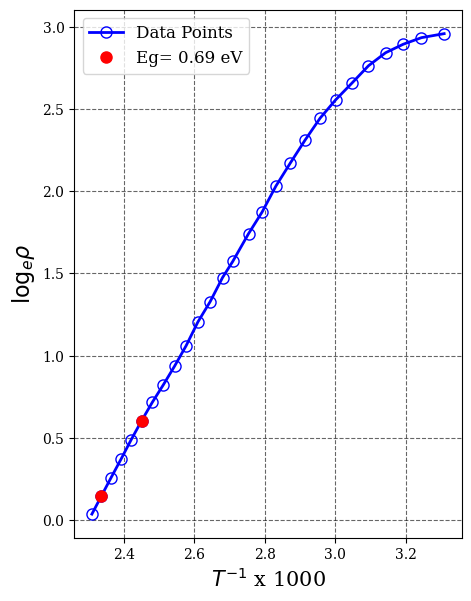

In [21]:
# array for slope markers
t_slope = np.array([T_inv[-2],T_inv[-6]])
rho_slope = np.log(np.array([Rho[-2],Rho[-6]]))

#plot rho vs T^-1
plt.figure(figsize=(5,7), dpi=100)
plt.plot((T**-1)*1000, np.log(Rho), marker='o', mfc='none',ms=8,
         color='blue',lw=2, label='Data Points')
plt.plot(t_slope*1000, rho_slope, ls='none',
         marker='o', mfc='red',ms=8, color='red',lw=2, label='Eg= %2.2f eV'%Eg)

plt.legend(loc='upper left', fontsize=12)
plt.xlabel('$T^{-1}$ x 1000', fontsize=15)
plt.ylabel('$\\log_{e} \\rho$', fontsize=16)
plt.grid(alpha=0.6, color='black', linestyle='--')
# plt.savefig('rho_vs_Tinv.jpg', dpi=300, bbox_inches='tight')

## Data

In [27]:
# print elements of T row-wise, separated with comma
print(', '.join(map(str, T)))
print('\n')
print(', '.join(map(str, df['V'].values)))

29, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 96, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160


0.34, 0.331, 0.318, 0.302, 0.279, 0.251, 0.227, 0.203, 0.177, 0.154, 0.134, 0.114, 0.1, 0.0845, 0.0766, 0.0661, 0.0585, 0.0506, 0.0447, 0.0399, 0.0359, 0.0321, 0.0286, 0.0254, 0.0227, 0.0203, 0.01814


In [28]:
# hadrd coded T and V values
T = np.array([29, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 96, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160])
V = np.array([0.34, 0.331, 0.318, 0.302, 0.279, 0.251, 0.227, 0.203, 0.177, 0.154, 0.134, 0.114, 0.1, 0.0845, 0.0766, 0.0661, 0.0585, 0.0506, 0.0447, 0.0399, 0.0359, 0.0321, 0.0286, 0.0254, 0.0227, 0.0203, 0.01814])